## Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import json
import os
from tqdm import tqdm,tqdm_notebook
import gc

## Importing dataset from kaggle

In [3]:
path_to_json = '/kaggle/input/CORD-19-research-challenge/document_parses/pdf_json'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

In [4]:
len(json_files)

334526

## Exploratory Data Analysis

### Converting JSON to DATAFRAME

In [5]:
jsons_data = pd.DataFrame(columns=['paper_id', 'abstract', 'body_text'])

id2abstract = []

for index, js in enumerate(json_files[:1000]):     # 1000 files to reduce memory load and resources
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)

        paper_id = json_text['paper_id']
        abstract=''
        for entry in json_text['abstract']:
                abstract += entry['text']
        id2abstract.append({paper_id:abstract})
        body_text=""
        for entry in json_text['body_text']:
                body_text += entry['text']
                
        jsons_data.loc[index] = [paper_id, abstract, body_text]

jsons_data

,paper_id,abstract,body_text
0,8187ea360c53a56ca2c579d758a5d6aa67716836,,Research Letter to the Editor:We are writing t...
1,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,Background Brazil ranks second worldwide in to...,The COVID-19 pandemic has created an unprecede...
2,edb294108440787c9f074483fd3c953a83e53622,,Die Corona-Pandemie ist eine Gefahr für die Ge...
3,ee5af71875f2e77135974c75980ce22fff03e4f8,,"Particularly in these pandemic times, appeals ..."
4,a0bc6bc5b8547b98a2d77b81ca81cb18fa1b7ee9,,"To the editor, We read with great interest the..."
...,...,...,...
995,70f20edcc4972dbf822b36319fc901f14d2bd35c,,Smoking status was ascertained using responses...
996,f35ddc35738e5322398a15e8ff8bdfb5a93c1ea8,,Critically ill patients have a high nutritiona...
997,18969dbda437d5d368a51505051a8fca4d15ede1,Sociedades justas: una nueva visión para la eq...,Los importantes desafíos a la equidad en la sa...
998,c8d278b408c11c8920171972d7270944e707136c,Background: All research has room for improvem...,A study's got to know its limitations P h ...


In [6]:
df = jsons_data
df.describe()

,paper_id,abstract,body_text
count,1000,1000,1000
unique,1000,689,1000
top,8187ea360c53a56ca2c579d758a5d6aa67716836,,Research Letter to the Editor:We are writing t...
freq,1,310,1


### Data Preprocessing
### Word Count

In [7]:
df['abstract_word_count'] = df['abstract'].apply(lambda x: len(x.strip().split()))  # word count in abstract
df['body_word_count'] = df['body_text'].apply(lambda x: len(x.strip().split()))  # word count in body
df['body_unique_words']=df['body_text'].apply(lambda x:len(set(str(x).split())))  # number of unique words in body
df.head()

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,8187ea360c53a56ca2c579d758a5d6aa67716836,,Research Letter to the Editor:We are writing t...,0,793,437
1,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,Background Brazil ranks second worldwide in to...,The COVID-19 pandemic has created an unprecede...,372,4086,1298
2,edb294108440787c9f074483fd3c953a83e53622,,Die Corona-Pandemie ist eine Gefahr für die Ge...,0,2411,1263
3,ee5af71875f2e77135974c75980ce22fff03e4f8,,"Particularly in these pandemic times, appeals ...",0,2898,1250
4,a0bc6bc5b8547b98a2d77b81ca81cb18fa1b7ee9,,"To the editor, We read with great interest the...",0,94,76


### Checking for null values

In [8]:
for col in df.columns:
    print(col, df[col].isnull().sum())

paper_id 0
abstract 0
body_text 0
abstract_word_count 0
body_word_count 0
body_unique_words 0


### Deleting rows with word count = 0

In [9]:
df.drop(df.index[df['abstract_word_count'] == 0], inplace = True)
df.drop(df.index[df['body_word_count'] == 0], inplace = True)
df

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
1,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,Background Brazil ranks second worldwide in to...,The COVID-19 pandemic has created an unprecede...,372,4086,1298
6,89afc7a375be1b21ee163ab5877961e19a501638,Vaccine hesitancy could become a significant i...,The death toll of COVID-19 cases and failed pa...,250,3328,1094
7,6316b4bc0a8cf6564d0f5a2ea5de007179681777,The COVID-19 pandemic has spread globally for ...,"The Corona Virus Disease 2019 , pandemic is an...",221,3952,1271
8,6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff,Coronavirus disease 2019 is a global pandemic ...,Forces beyond your control can take away every...,208,2841,1110
11,29cabfc9266fce1b1df3c5bace325ddcf51beee4,Mobilizing cross-disciplinary teams to advance...,"With research becoming more team-based [1, 2] ...",11,5414,1757
...,...,...,...,...,...,...
992,7c3f34c8964bf11ac1e6a0b89da697085a50eeff,Various studies showed the negative impact of ...,Background Various studies showed the negative...,215,1000,407
994,8a4bf88a7ed377eb31bf63a339922a8daa76873a,"Word count: Abstract: 208 words, Main Text: 3,...",The severe acute respiratory syndrome coronavi...,339,2781,857
997,18969dbda437d5d368a51505051a8fca4d15ede1,Sociedades justas: una nueva visión para la eq...,Los importantes desafíos a la equidad en la sa...,22,2771,1001
998,c8d278b408c11c8920171972d7270944e707136c,Background: All research has room for improvem...,A study's got to know its limitations P h ...,168,1856,775


### Converting to lower case

In [10]:
df["abstract"] = df["abstract"].str.lower() 
df["body_text"] = df["body_text"].str.lower() 
df.head(10)

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
1,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,background brazil ranks second worldwide in to...,the covid-19 pandemic has created an unprecede...,372,4086,1298
6,89afc7a375be1b21ee163ab5877961e19a501638,vaccine hesitancy could become a significant i...,the death toll of covid-19 cases and failed pa...,250,3328,1094
7,6316b4bc0a8cf6564d0f5a2ea5de007179681777,the covid-19 pandemic has spread globally for ...,"the corona virus disease 2019 , pandemic is an...",221,3952,1271
8,6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff,coronavirus disease 2019 is a global pandemic ...,forces beyond your control can take away every...,208,2841,1110
11,29cabfc9266fce1b1df3c5bace325ddcf51beee4,mobilizing cross-disciplinary teams to advance...,"with research becoming more team-based [1, 2] ...",11,5414,1757
12,c79ce955bfc71ffe8159bca6bc81d783a86d8edf,the asymptomatic novel coronavirus infection (...,the world health organization first declared a...,261,1089,509
13,840d4d83b6907c5c74de5f5f3b154244034ccd03,the coronavirus disease 2019 has had devastati...,the coronavirus disease 2019 (covid-19) has ha...,86,2913,997
16,be9bdbb4987a83ad38fb0b65018528055e13eab7,aims/hypothesis transmembrane protein 27 (tmem...,type 2 diabetes is a complex disease that pres...,243,4445,1531
18,dc7683d6e5521d574246b74bdf325fc55d204f37,smart factories have already become a key them...,smart factory is already being distributed as ...,186,2715,970
20,3d6b9fe811d37a5d4e9ab8521a7c5b1e91141ee8,background typhoid fever remains a major cause...,despite decades of worldwide effort to improve...,352,5937,1867


### Removing Stopwords

In [11]:
import nltk
nltk.download('stopwords')
stopwords_custom = nltk.corpus.stopwords.words('english')
customize_stop_words = ['common','review','describes','abstract','retrospective','chart','patients','study','may',
                        'associated','results','including','high''found','one','well','among','Abstract','provide',
                        'objective','objective:','background','range','features','participates','doi', 'preprint', 
                        'copyright', 'org', 'https', 'et ','et' 'al', 'author', 'figure', 'table', 'rights', 'reserved', 
                        'permission', 'use', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 'al.', 
                        'Elsevier', 'PMC', 'CZI']
### append custom stopwords to default stopwords from NLTK
for i in customize_stop_words:
    stopwords_custom.append(i)
    
df['abstract'] = df['abstract'].apply(lambda x: " ".join([word for word in x.split() if word not in (stopwords_custom)]))
df['body_text'] = df['body_text'].apply(lambda x: " ".join([word for word in x.split() if word not in (stopwords_custom)]))
df

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
1,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,brazil ranks second worldwide total number cov...,covid-19 pandemic created unprecedented worldw...,372,4086,1298
6,89afc7a375be1b21ee163ab5877961e19a501638,vaccine hesitancy could become significant imp...,death toll covid-19 cases failed pandemic prep...,250,3328,1094
7,6316b4bc0a8cf6564d0f5a2ea5de007179681777,covid-19 pandemic spread globally several mont...,"corona virus disease 2019 , pandemic ongoing p...",221,3952,1271
8,6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff,coronavirus disease 2019 global pandemic affec...,forces beyond control take away everything pos...,208,2841,1110
11,29cabfc9266fce1b1df3c5bace325ddcf51beee4,mobilizing cross-disciplinary teams advance tr...,"research becoming team-based [1, 2] , critical...",11,5414,1757
...,...,...,...,...,...,...
992,7c3f34c8964bf11ac1e6a0b89da697085a50eeff,various studies showed negative impact covid-1...,various studies showed negative impact covid-1...,215,1000,407
994,8a4bf88a7ed377eb31bf63a339922a8daa76873a,"word count: abstract: 208 words, main text: 3,...",severe acute respiratory syndrome coronavirus ...,339,2781,857
997,18969dbda437d5d368a51505051a8fca4d15ede1,sociedades justas: una nueva visión para la eq...,los importantes desafíos la equidad en la salu...,22,2771,1001
998,c8d278b408c11c8920171972d7270944e707136c,"background: research room improvement, authors...","study's got know limitations p h l g c h , e w...",168,1856,775


### Replacing contraction words

In [12]:
!pip install contractions

     |████████████████████████████████| 284 kB 888 kB/s            
     |████████████████████████████████| 106 kB 13.8 MB/s            


In [13]:
import contractions
df['abstract'] = df['abstract'].apply(lambda x: " ".join([contractions.fix(word) for word in x.split()]))
df['body_text'] = df['body_text'].apply(lambda x: " ".join([contractions.fix(word) for word in x.split()]))
df.head()

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
1,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,brazil ranks second worldwide total number cov...,covid-19 pandemic created unprecedented worldw...,372,4086,1298
6,89afc7a375be1b21ee163ab5877961e19a501638,vaccine hesitancy could become significant imp...,death toll covid-19 cases failed pandemic prep...,250,3328,1094
7,6316b4bc0a8cf6564d0f5a2ea5de007179681777,covid-19 pandemic spread globally several mont...,"corona virus disease 2019 , pandemic ongoing p...",221,3952,1271
8,6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff,coronavirus disease 2019 global pandemic affec...,forces beyond control take away everything pos...,208,2841,1110
11,29cabfc9266fce1b1df3c5bace325ddcf51beee4,mobilizing cross-disciplinary teams advance tr...,"research becoming team-based [1, 2] , critical...",11,5414,1757


### Remove Puctuation

In [14]:
from nltk.tokenize import RegexpTokenizer
tokenizer_pattern = RegexpTokenizer('\w+')
df['abstract'] = df['abstract'].apply(lambda x: " ".join(tokenizer_pattern.tokenize(x.lower())))
df['body_text'] = df['body_text'].apply(lambda x: " ".join(tokenizer_pattern.tokenize(x.lower())))
df

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
1,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,brazil ranks second worldwide total number cov...,covid 19 pandemic created unprecedented worldw...,372,4086,1298
6,89afc7a375be1b21ee163ab5877961e19a501638,vaccine hesitancy could become significant imp...,death toll covid 19 cases failed pandemic prep...,250,3328,1094
7,6316b4bc0a8cf6564d0f5a2ea5de007179681777,covid 19 pandemic spread globally several mont...,corona virus disease 2019 pandemic ongoing pan...,221,3952,1271
8,6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff,coronavirus disease 2019 global pandemic affec...,forces beyond control take away everything pos...,208,2841,1110
11,29cabfc9266fce1b1df3c5bace325ddcf51beee4,mobilizing cross disciplinary teams advance tr...,research becoming team based 1 2 critical univ...,11,5414,1757
...,...,...,...,...,...,...
992,7c3f34c8964bf11ac1e6a0b89da697085a50eeff,various studies showed negative impact covid 1...,various studies showed negative impact covid 1...,215,1000,407
994,8a4bf88a7ed377eb31bf63a339922a8daa76873a,word count abstract 208 words main text 3 363 ...,severe acute respiratory syndrome coronavirus ...,339,2781,857
997,18969dbda437d5d368a51505051a8fca4d15ede1,sociedades justas una nueva visión para la equ...,los importantes desafíos la equidad en la salu...,22,2771,1001
998,c8d278b408c11c8920171972d7270944e707136c,background research room improvement authors a...,study s got know limitations p h l g c h e w r...,168,1856,775


In [15]:
df = df.reset_index(drop=True)
df

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,brazil ranks second worldwide total number cov...,covid 19 pandemic created unprecedented worldw...,372,4086,1298
1,89afc7a375be1b21ee163ab5877961e19a501638,vaccine hesitancy could become significant imp...,death toll covid 19 cases failed pandemic prep...,250,3328,1094
2,6316b4bc0a8cf6564d0f5a2ea5de007179681777,covid 19 pandemic spread globally several mont...,corona virus disease 2019 pandemic ongoing pan...,221,3952,1271
3,6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff,coronavirus disease 2019 global pandemic affec...,forces beyond control take away everything pos...,208,2841,1110
4,29cabfc9266fce1b1df3c5bace325ddcf51beee4,mobilizing cross disciplinary teams advance tr...,research becoming team based 1 2 critical univ...,11,5414,1757
...,...,...,...,...,...,...
685,7c3f34c8964bf11ac1e6a0b89da697085a50eeff,various studies showed negative impact covid 1...,various studies showed negative impact covid 1...,215,1000,407
686,8a4bf88a7ed377eb31bf63a339922a8daa76873a,word count abstract 208 words main text 3 363 ...,severe acute respiratory syndrome coronavirus ...,339,2781,857
687,18969dbda437d5d368a51505051a8fca4d15ede1,sociedades justas una nueva visión para la equ...,los importantes desafíos la equidad en la salu...,22,2771,1001
688,c8d278b408c11c8920171972d7270944e707136c,background research room improvement authors a...,study s got know limitations p h l g c h e w r...,168,1856,775


## Data Visualization using word cloud

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

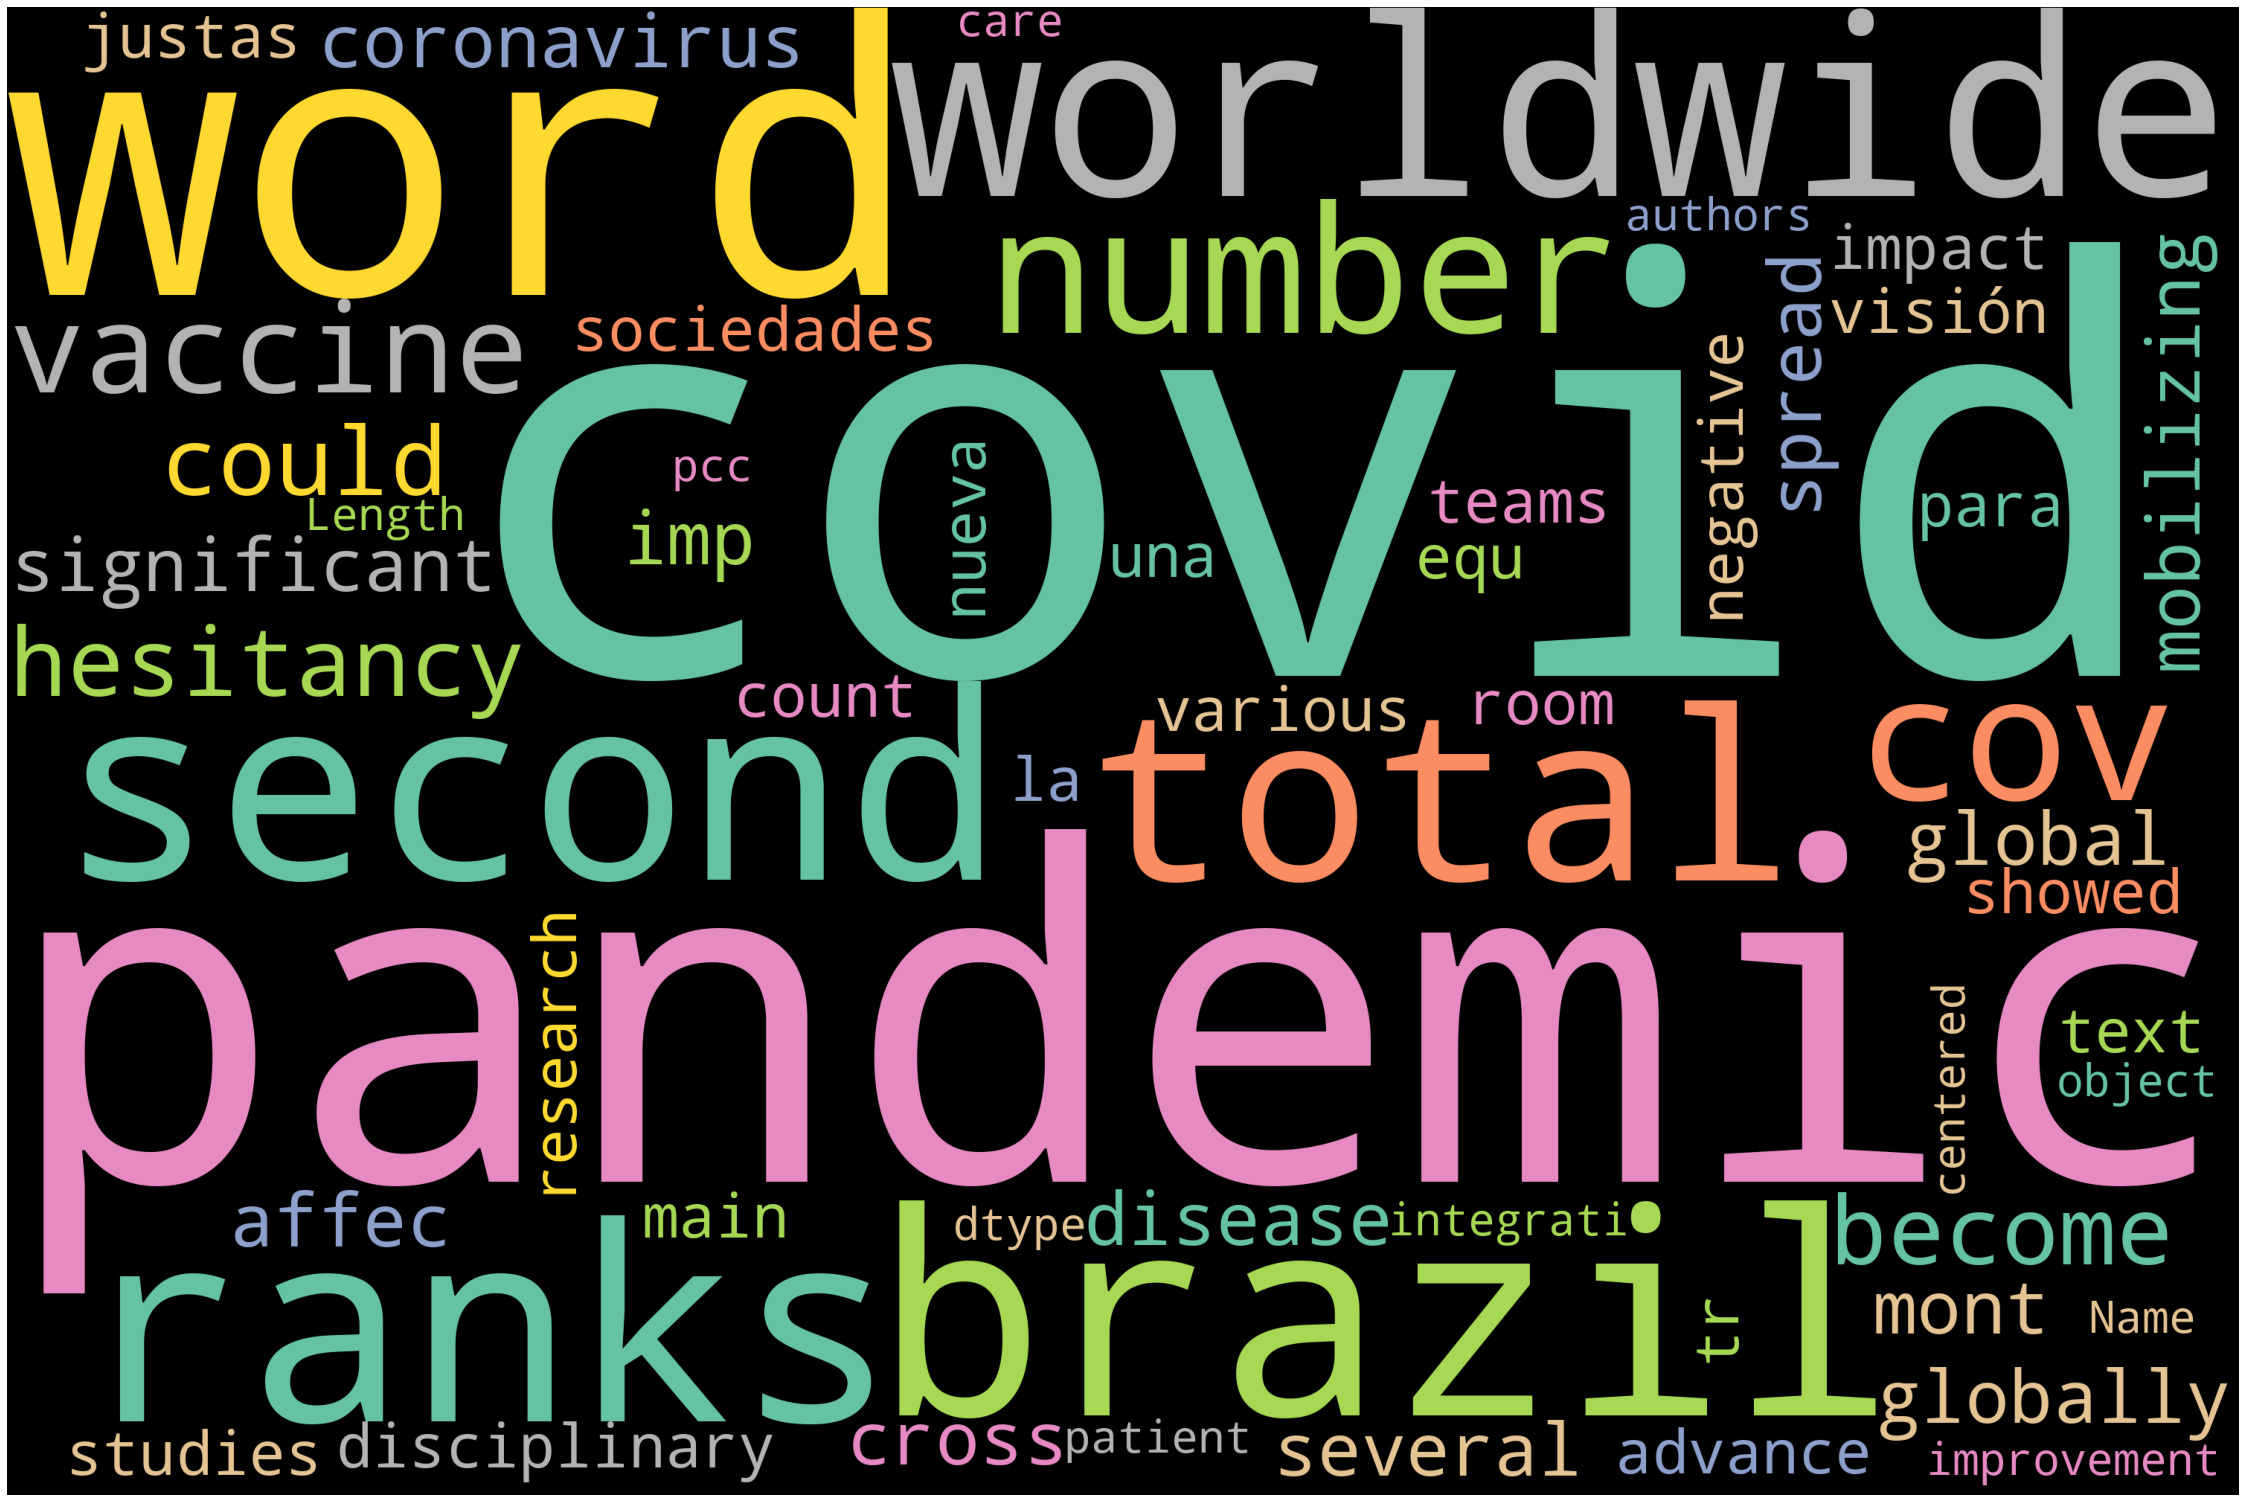

In [17]:
abstract_text = str(df.abstract)

# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = stopwords_custom).generate(abstract_text)
# Plot
plot_cloud(wordcloud)

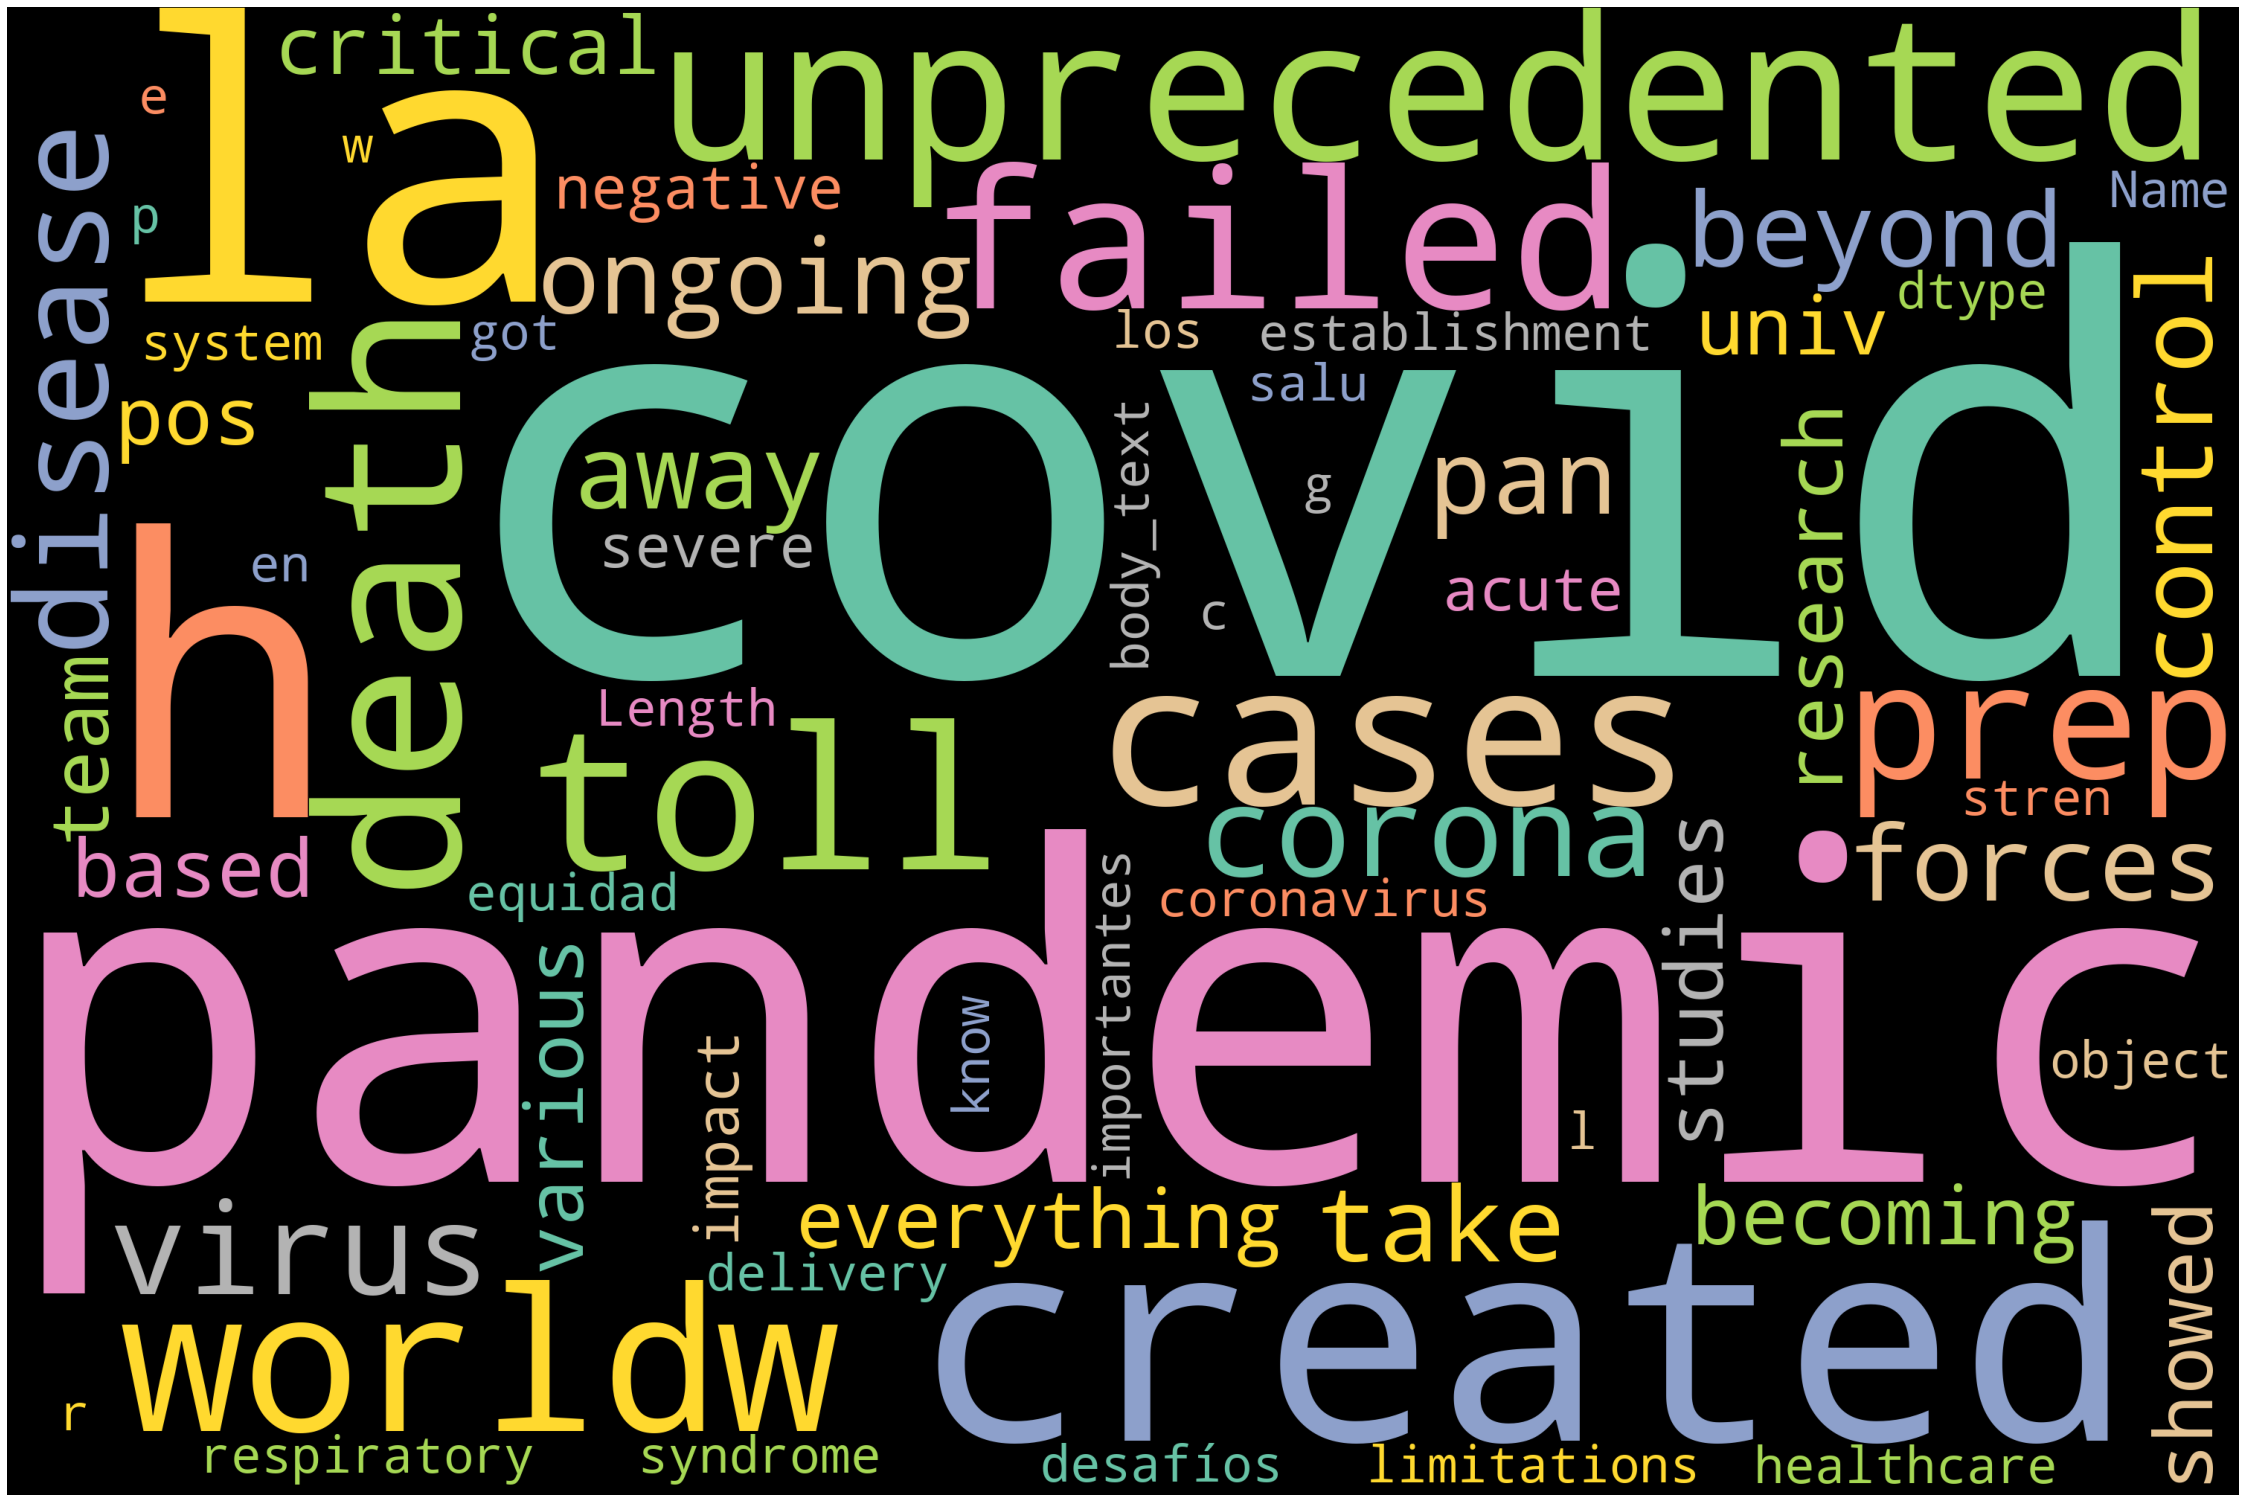

In [18]:
text = str(df.body_text)

# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = stopwords_custom).generate(text)
# Plot
plot_cloud(wordcloud)

## NER (Named Entity Recognition)

### Installing dependencies

In [19]:
!pip install -U spacy
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_sm-0.5.0.tar.gz

  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
tensorflow 2.6.2 requires numpy~=1.19.2, but you have numpy 1.20.3 which is incompatible.
tensorflow 2.6.2 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.6.2 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.2 which is incompatible.
tensorflow 2.6.2 requires wrapt~=1.12.1, but you have wrapt 1.13.3 which is incompatible.
tensorflow-transform 1.5.0 requires absl-py<0.13,>=0.9, but you have absl-py 0.1

### Importing Libraries

In [20]:
import scispacy
import spacy
import en_core_sci_sm
from spacy import displacy
from scispacy.abbreviation import AbbreviationDetector
from scispacy.umls_linking import UmlsEntityLinker

Your CPU supports instructions that this binary was not compiled to use: SSE3 SSE4.1 SSE4.2 AVX AVX2
For maximum performance, you can install NMSLIB from sources 
pip install --no-binary :all: nmslib


In [21]:
nlp = spacy.load("en_core_sci_sm")

In [22]:
text = '''Myeloid derived suppressor cells (MDSC) are immature 
          myeloid cells with immunosuppressive activity. 
          They accumulate in tumor-bearing mice and humans 
          with different types of cancer, including hepatocellular 
          carcinoma (HCC).'''
text

'Myeloid derived suppressor cells (MDSC) are immature \n          myeloid cells with immunosuppressive activity. \n          They accumulate in tumor-bearing mice and humans \n          with different types of cancer, including hepatocellular \n          carcinoma (HCC).'

In [23]:
doc = nlp(text)
print(doc.ents)

(Myeloid, suppressor cells, MDSC, immature, myeloid cells, immunosuppressive activity, accumulate, tumor-bearing mice, humans, cancer, hepatocellular 
          carcinoma, HCC)


In [24]:
from spacy import displacy
displacy.render(next(doc.sents), style='dep', jupyter=True)

In [25]:
nlp.add_pipe("abbreviation_detector")

In [26]:
doc = nlp(text)

print("Abbreviation", "\t", "Definition")
for abrv in doc._.abbreviations:
	print(f"{abrv} \t ({abrv.start}, {abrv.end}) {abrv._.long_form}")

Abbreviation 	 Definition
MDSC 	 (5, 6) Myeloid derived suppressor cells
HCC 	 (36, 37) hepatocellular 
          carcinoma


In [27]:
from scispacy.linking import EntityLinker

nlp = spacy.load("en_core_sci_sm")

In [28]:
displacy.serve(doc, style="ent")

/opt/conda/lib/python3.7/site-packages/spacy/displacy/__init__.py:98: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
